# Bibiloteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

# Wnioski

-  Zakres wieku wyniosi 18 - 64 lat, BMI 16 - 53, a opłaty 1 100 - 63 700
-  Wysoka korelacja (0.78) pomiędzy zmiennymi *charges* i *smoker*, oznacza że osoby palące przeciętnie płacą więcej.
-  Podział płci w zbiorze jest równy - około 50% każda.
-  W zbiorze 79.5% stanowią osoby niepalące - lekko przeważają wśród nich kobiety.
-  Wraz z wiekiem rosną opłaty
-  Osoby niepalące płacą średnio najwięcej w region SE, a palące w NE
-  BMI nie ma wpływu na opłaty dla osób niepalących, przeciwnie zaś dla osób palących.

# Podgląd danych

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print('Liczba duplikatów: {}'.format(df.duplicated().sum()))
df.loc[df.duplicated() == True]

Liczba duplikatów: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


In [6]:
df.shape

(1338, 7)

# Obróbka danych

In [7]:
df = pd.read_csv('insurance.csv')

smoke = {'yes': 1,'no': 0}
sexes = {'female': 1,'male': 0}

print('Unique regions in dataset {}'.format(df.region.unique()))

df.smoker = [smoke[x] for x in df.smoker]
df.sex = [sexes[x] for x in df.sex]
df

Unique regions in dataset ['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


# Macierz korelacji

In [8]:
corr = df.corr(numeric_only = True)
corr

,age,sex,bmi,children,smoker,charges
age,1.00,0.02,0.11,0.04,-0.03,0.30
sex,0.02,1.00,-0.05,-0.02,-0.08,-0.06
bmi,0.11,-0.05,1.00,0.01,0.00,0.20
children,0.04,-0.02,0.01,1.00,0.01,0.07
smoker,-0.03,-0.08,0.00,0.01,1.00,0.79
charges,0.30,-0.06,0.20,0.07,0.79,1.00


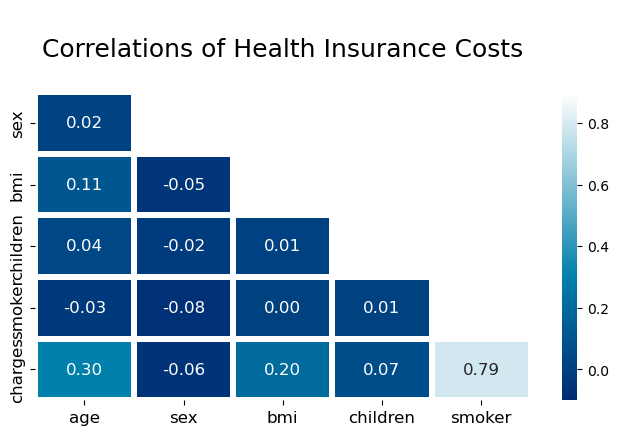

In [9]:
fig, ax = plt.subplots(figsize=(8,4))   

mask = np.triu(np.ones_like(df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='ocean', linewidths=4, annot_kws={"fontsize":12})

ax.set_title('\nCorrelations of Health Insurance Costs\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

# General

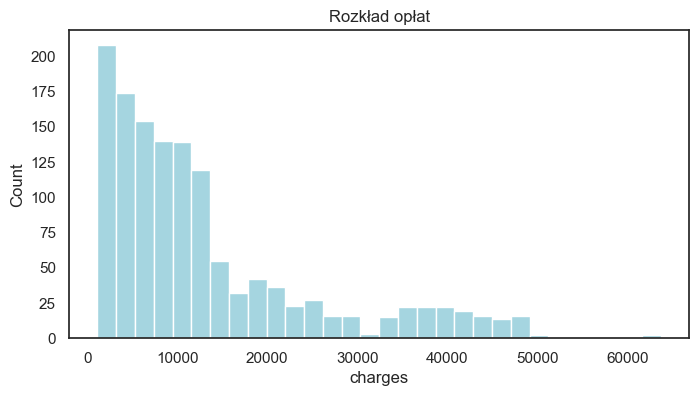

In [10]:
plt.figure(figsize=(8,4))
sns.set(style='white')
sns.histplot(df.charges, color = '#87c8d6')
plt.title('Rozkład opłat')
plt.show()

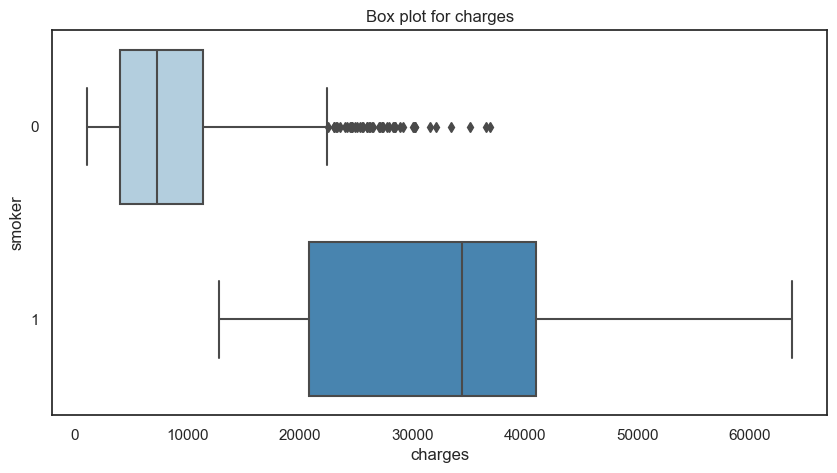

In [11]:
plt.figure(figsize=(10,5))
plt.title("Box plot for charges")
sns.boxplot(x = df.charges, y = df.smoker, orient="h", palette='Blues')
plt.show()

Procent mężczyzn: 49.48%
Procent kobiet: 50.52%


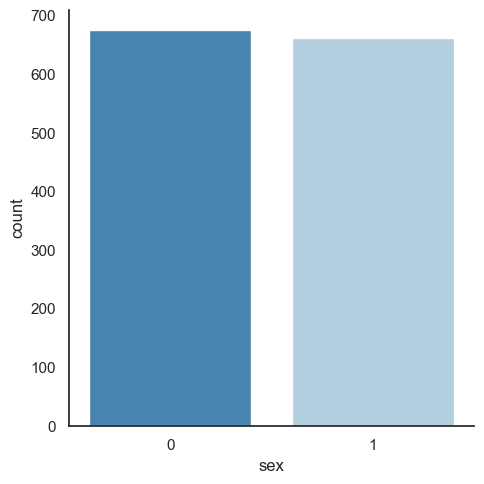

In [12]:
print('Procent mężczyzn: {:.2f}%'.format(df[df.sex==1].sex.count()/1338 * 100))
print('Procent kobiet: {:.2f}%'.format(df[df.sex==0].sex.count()/1338 * 100))

sns.catplot(x="sex", kind="count", palette="Blues_r", data=df)
plt.show()

Procent osób niepalących 79.52%


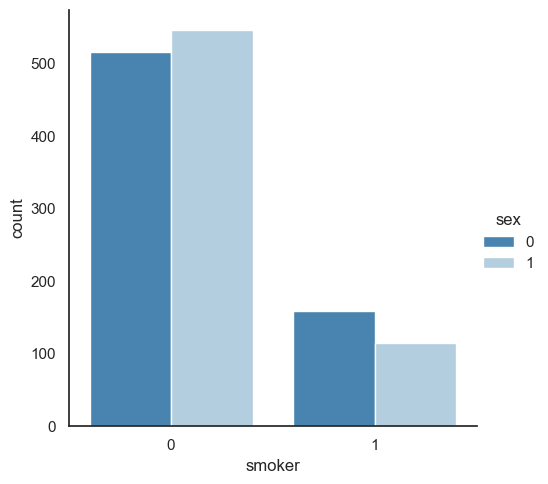

In [13]:
print('Procent osób niepalących {:.2f}%'.format(df[df.smoker==0].smoker.count()/1338 * 100))

sns.catplot(x="smoker", kind="count", hue = 'sex', palette="Blues_r", data=df)
plt.show()

# Age

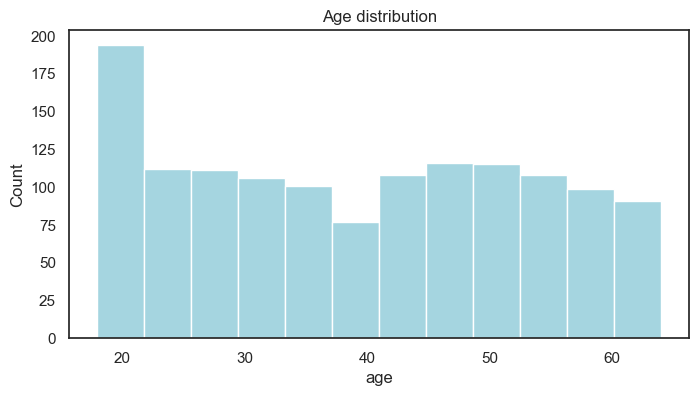

In [14]:
plt.figure(figsize=(8,4))
sns.set(style='white')
sns.histplot(df.age, color = '#87c8d6', )
plt.title('Age distribution')
plt.show()

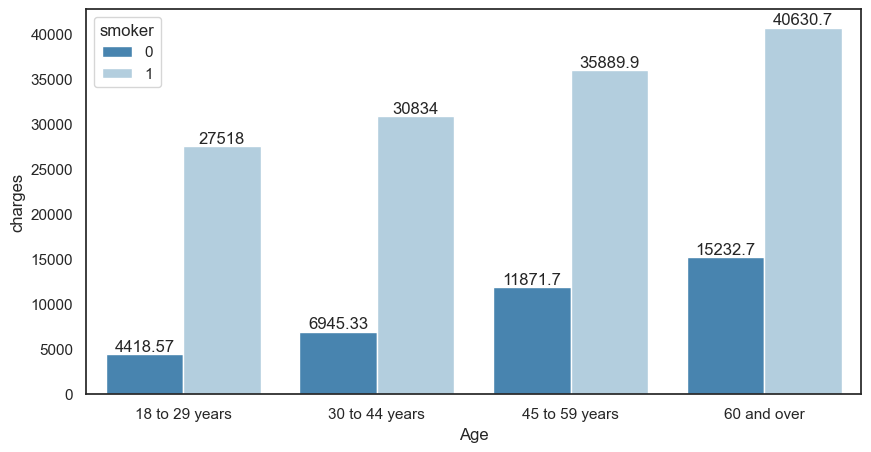

In [46]:
plot_df = df.copy()
plot_df["Age"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in df['age']]
plot_df = plot_df.groupby(['Age','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Age", y="charges", hue = 'smoker', palette="Blues_r", data=plot_df)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

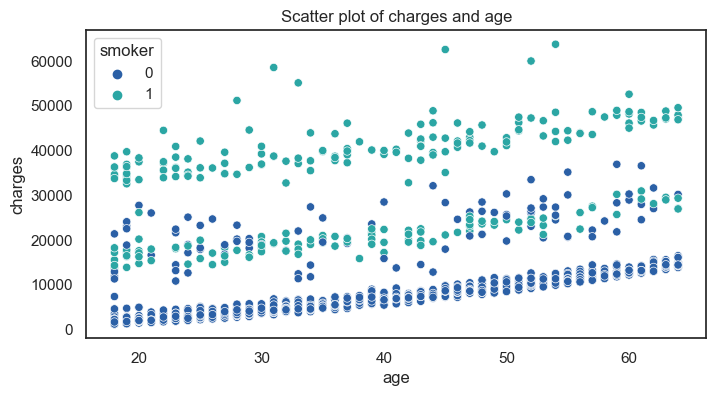

In [16]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x='age', y='charges', data=df, palette=['#2b60a6', '#2ba6a4'], hue='smoker')
ax.set_title('Scatter plot of charges and age')
plt.show()

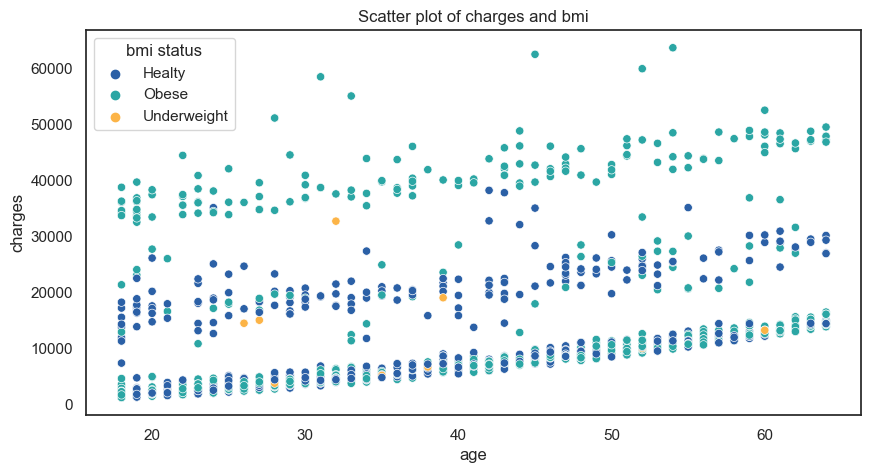

In [41]:
plot_df = df.copy()
plot_df["bmi status"] = ['Obese' if i>30 else 'Healty' if (i<=30)&(i>18.5) 
                         else 'Underweight' for i in df['bmi']]
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='age', y='charges', data = plot_df, palette=['#2b60a6', '#2ba6a4', '#fcb447'], hue='bmi status')
ax.set_title('Scatter plot of charges and bmi')
plt.show()

# Region 

Liczba osób na region southwest wynosi: 325
Liczba osób na region southeast wynosi: 364
Liczba osób na region northwest wynosi: 325
Liczba osób na region northeast wynosi: 324


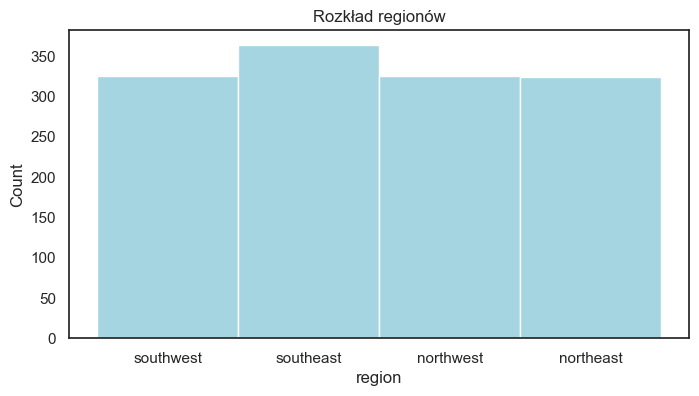

In [26]:
regions = df.region.unique()
for i in regions:
    print('Liczba osób na region {} wynosi: {}'.format(i, df[df.region == i].sex.count()))

plt.figure(figsize=(8,4))
sns.set(style='white')
sns.histplot(df.region, color = '#87c8d6')
plt.title('Rozkład regionów')
plt.show()

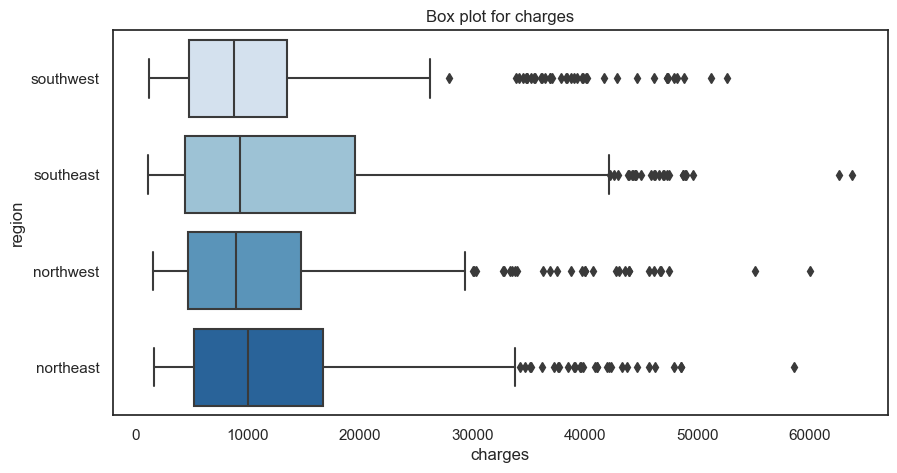

In [18]:
plt.figure(figsize=(10,5))
plt.title("Box plot for charges")
sns.boxplot(x = df.charges, y = df.region, orient="h", palette='Blues')
plt.show()

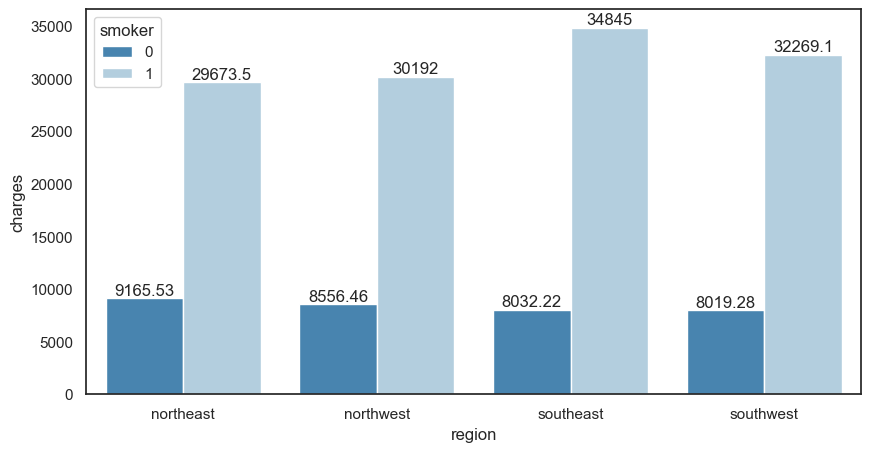

In [19]:
plot_df = df.copy()
plot_df = plot_df.groupby(['region','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="region", y="charges", hue = 'smoker', palette="Blues_r", data=plot_df)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

# Children 

Liczba osób z 0 dzieci wynosi: 574
Liczba osób z 1 dzieci wynosi: 324
Liczba osób z 3 dzieci wynosi: 157
Liczba osób z 2 dzieci wynosi: 240
Liczba osób z 5 dzieci wynosi: 18
Liczba osób z 4 dzieci wynosi: 25


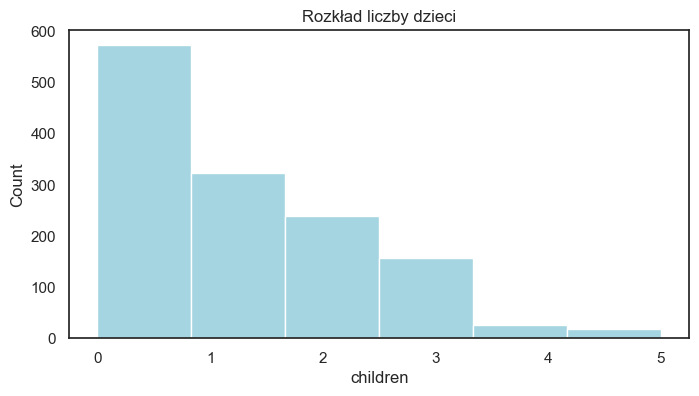

In [28]:
children = df.children.unique()
for i in children:
    print('Liczba osób z {} dzieci wynosi: {}'.format(i, df[df.children == i].sex.count()))


plt.figure(figsize=(8,4))
sns.set(style='white')
sns.histplot(df.children, color = '#87c8d6', bins = 6)
plt.title('Rozkład liczby dzieci')
plt.show()

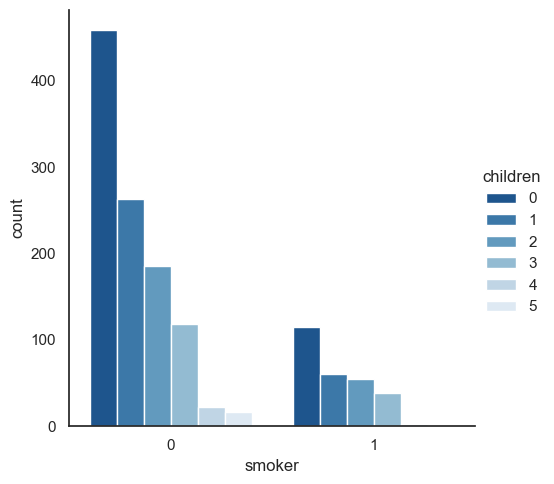

In [21]:
sns.catplot(x="smoker", kind="count", hue = 'children', palette="Blues_r", data=df)
plt.show()

# BMI 

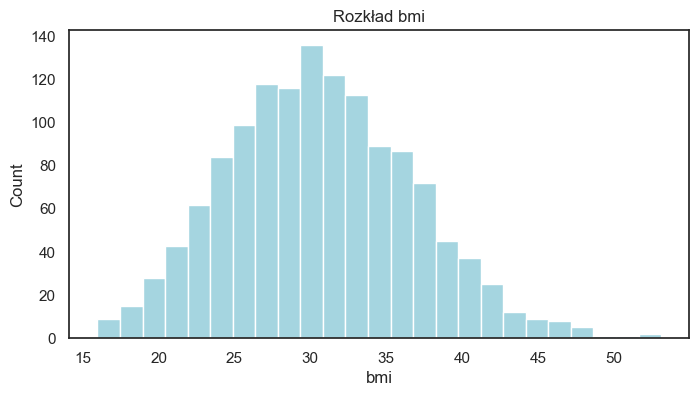

In [22]:
plt.figure(figsize=(8,4))
sns.set(style='white')
sns.histplot(df.bmi, color = '#87c8d6')
plt.title('Rozkład bmi')
plt.show()

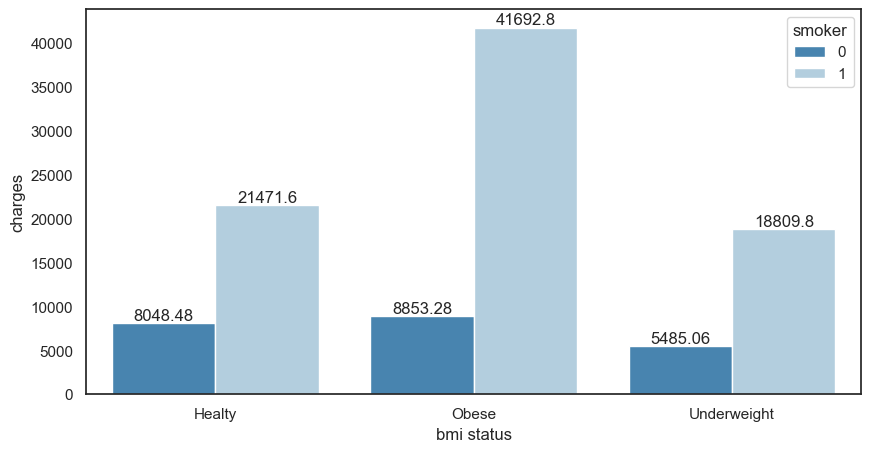

In [48]:
plot_df = df.copy()
plot_df["bmi status"] = ['Obese' if i>30 else 'Healty' if (i<=30)&(i>18.5) 
                         else 'Underweight' for i in df['bmi']]
plot_df = plot_df.groupby(['bmi status','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="bmi status", y="charges", hue = 'smoker', palette="Blues_r", data=plot_df)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

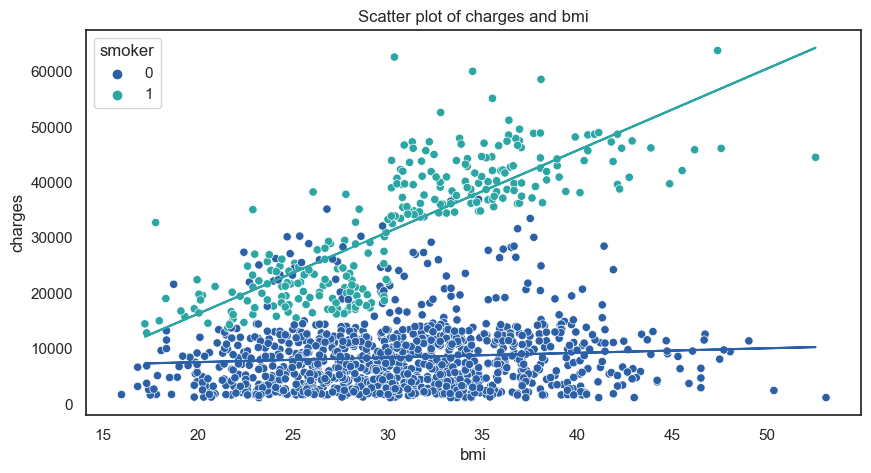

In [57]:
plt.figure(figsize=(10,5))

smoker_1 = np.polyfit(df[df.smoker==1].bmi, df[df.smoker==1].charges, 1)
smoker_0 = np.polyfit(df[df.smoker==0].bmi, df[df.smoker==0].charges, 1)

poly_1 = np.poly1d(smoker_1)
poly_0 = np.poly1d(smoker_0)

plt.plot(df[df.smoker==1].bmi, poly_1(df[df.smoker==1].bmi), '#2ba6a4')
plt.plot(df[df.smoker==1].bmi, poly_0(df[df.smoker==1].bmi), '#2b60a6')

ax = sns.scatterplot(x='bmi', y='charges', data = df, palette=['#2b60a6', '#2ba6a4'], hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
plt.show()

#Dla palących zależność rosnąca, dla niepalących niezmienna